# Linear Regression

## Introduction

To plot a straight line, we need at least two points. These points will help us determine the slope and intercept of the line. Suppose we know two points: (x1,y1) and (x2,y2).


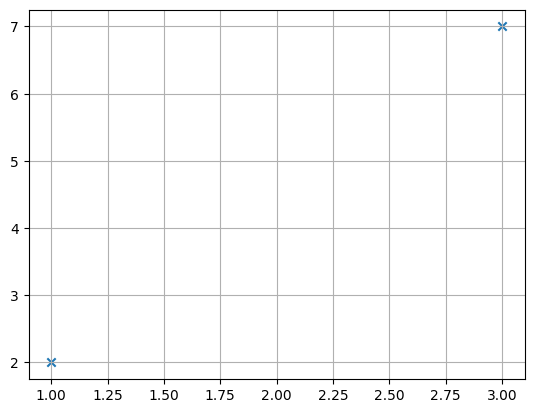

In [14]:
import matplotlib.pyplot as plt

P1 = (1.0,2.0) # point one with coordinate (1.0, 2.0)
P2 = (3.0,7.0) # point two with coordinate (3.0, 7.0)
# Assign coordinates to variables 
x1, y1 = P1
x2, y2 = P2
# Plotting the points
plt.scatter((x1, x2), (y1, y2), marker='x')
plt.grid(True)
plt.show()

## How to calculate the slope (w) and intercept (b) for linear regression

When we have two points and we trace a line between them, we can calculate the slope (w) and the intercept (b). Suppose we want to know how steep is it. When we 'travel' along the line from `P1` to `P2`, we can use the formula for the slope:

```math
w = \frac{y2 - y1}{x2 - x1}
```
This expression is the 'Rise over Run' formula, which gives us the slope of the any line and it describes how much the line rises (or falls) for each unit of horizontal distance. If we expand this formula, we will see the famous linear equation:

```math
y2-y1 = w * (x2-x1)
```
then, adding `y1` to both sides:
```math
y2 = (w * x2 - w * x1) + y1 
```
Re-ordering it gives us:
```math
y2 = w * x2 + (y1 - w * x1)
```

We can see that the term `(y1 - w * x1)` is the y-intercept (b) of the line:

```math
y2 = w * x2 + b
```
Once we have the slope, we can calculate the intercept (b) using the formula:

```math
b = y1 - w * x1
```

Now we have both `w` and `b` to describe the line between the two points.

slope:2.5, intercept:-0.5
Predicted point for x=1.5: 3.25


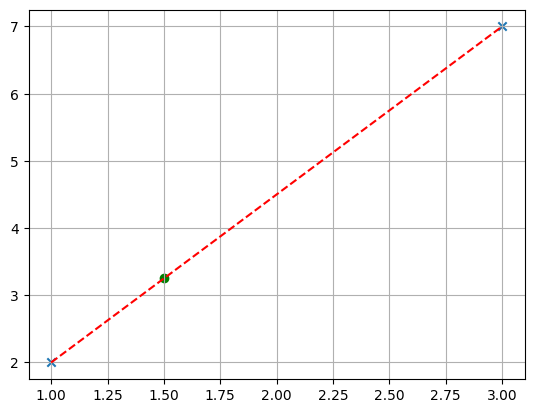

In [13]:
# Calculate the slope (w) and intercept (b)
w = (y2-y1) / (x2-x1)
b = y1 - w * x1
# Let's define the linear function
def linear_function(x:float,slope:float,intercept:float)->float:
    w = slope
    b = intercept
    y = w * x + b 
    return y
print(f"slope:{w}, intercept:{b}")
# Having defined the linear function and found the slope and intercept,
# we can now use the function to predict new values.
x3 = 1.5
predicted_point = linear_function(x3,w,b)
print(f"Predicted point for x={x3}: {predicted_point}")

plt.scatter((x1, x2), (y1, y2), marker='x')
plt.plot((x1, x2), (y1, y2), color='red', linestyle='--')
plt.scatter(x3, predicted_point, marker='o', color='green')
plt.grid(True)
plt.show()

# More than just two points
When you only have two points, it is easy to find the values of b and m that match the line passing through them. However, if you have more than two points—let's say 10 points—how can you define a straight line that fits all the points as closely as possible?
The answer lies in a method called "least squares." The idea is to find the line that minimizes the sum of the squared differences (the "errors") between the observed values (the actual data points) and the values predicted by the line.
In the following example, we will read a simulated data to search for the best-fitting line using the least squares method.

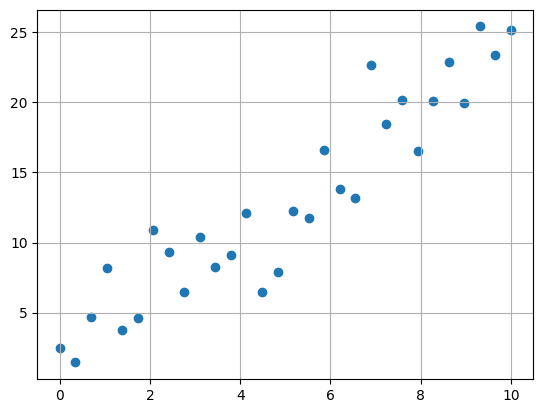

In [19]:
import pandas as pd
dataset = pd.read_csv("./dataset.csv")
plt.grid(True)
plt.scatter(dataset['x'], dataset['y'])
plt.show()


We can use two arbitrary points from the dataset to define the line.

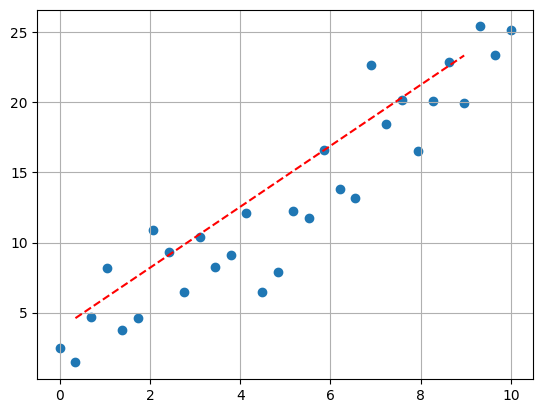

In [25]:
x_dataset = dataset.get('x')
y_dataset = dataset.get('y')
P1 = (x_dataset[1],y_dataset[5])
P2 = (x_dataset[26],y_dataset[28])
# assign x and y values
x1, y1 = P1
x2, y2 = P2
# plot creation
plt.plot((x1,x2),(y1,y2),color='red', linestyle='--')
plt.scatter(x_dataset,y_dataset)
plt.grid(True)
plt.show()

As you can see, the line does not match all the points exactly. Therefore, we need to calculate how "bad" this line is, create another line, calculate its error, and compare it with the first one to choose the better fit. In fact, we can repeat this process for all possible lines and select the best one.

To measure how well a straight line fits the data, we calculate the error: the difference between the predicted value and the actual value for each point (`y[n]_p` vs `y[n]`). Using the straight line defined by points P1 and P2, we can find the linear equation:


In [33]:
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1
x3 = 4.137931 # value taken of the dataset
y3 = linear_function(x3,m,b)
closest = dataset.iloc[(dataset["x"]-x3).abs().argmin()]
error = y3 - float(closest['y'])
print(f"w={m} - b={b}")
print(f">>y_pred = {y3} \n>>y_actual = {closest['y']}\n>>Error={error}")
# Since we have or we know the X values of a dataset (supervised learning), the goal now is find the slope (w) and the intercept (b) values which fits well


w=2.172457396926571 - b=3.8588107164191587
>>y_pred = 12.84828952534092 
>>y_actual = 12.070714400905
>>Error=0.7775751244359199


Is there a way to automate this process of finding the best-fitting line? Yes, and it is called the **Least Squares Method**. This method minimizes the sum of the squared errors (the differences between the predicted and actual values) to find the optimal line.
## Cost function
The cost function, often called the **Mean Squared Error (MSE)**, measures how well a line fits the data. It is defined as:

$$
J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} (y_{pred}^{(i)} - y^{(i)})^2
$$

where:
- $m$ is the number of data points,
- $y_{pred}^{(i)}$ is the predicted value,
- $y^{(i)}$ is the actual value.

Minimizing this cost function helps us find the optimal values for $w$ (slope) and $b$ (intercept) that make the line fit the data as closely as possible.
For each x value in the dataset, we can predict a $y$ value based on the $w$ (slope) and $b$ (intercept) values given. Then, we can compute all predicted $y$ values vs the actual $y$ values from the dataset (y_train). We will use the linear_regression.py module, in this module is defined the LinearRegression class, which will help us implement the least squares method.

Best line: y = 2.500x + 0.297, MSE = 212.004, id = 4


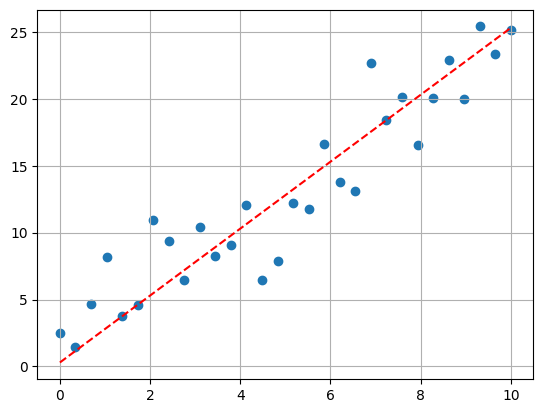

In [37]:
from linear_regression import LinearRegression
# define the training data
x_train = dataset['x']
y_train = dataset['y']
linear_model = LinearRegression(x_train, y_train)
# Get two points of the data training to calculate the slope and the intercept
x1, y1 = x_train[0], y_train[0]
x2, y2 = x_train[1], y_train[1]
slope = linear_model.compute_slope(x1, x2, y1, y2)
intercept = linear_model.compute_intercept(slope, x1, y1)
predicted_point = linear_model.predict_y(4.137931, slope, intercept)
linear_model.plot_dataset() # Plot the dataset
linear_model.get_linear_function() # plot the best line